In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import tqdm
import numpy as np
import utils
import dataloaders
import torchvision
from trainer import Trainer
torch.random.manual_seed(0)
np.random.seed(0)

### Dataset

In [6]:
# Load the dataset and print some stats
batch_size = 64

image_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean = (0.5),std = (0.5))
])

dataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)
example_images, _ = next(iter(dataloader_train))
print(f"The tensor containing the images has shape: {example_images.shape} (batch size, number of color channels, height, width)",
      f"The maximum value in the image is {example_images.max()}, minimum: {example_images.min()}", sep="\n\t")

The tensor containing the images has shape: torch.Size([64, 1, 28, 28]) (batch size, number of color channels, height, width)
	The maximum value in the image is 1.0, minimum: -1.0


In [68]:
def create_model():
    """
        Initializes the mode. Edit the code below if you would like to change the model.
    """
    model = nn.Sequential(
        nn.Flatten(), # Flattens the image from shape (batch_size, C, Height, width) to (batch_size, C*height*width)
        nn.Linear(1*28*28,64),
        nn.ReLU(),
        nn.Linear(64,512),
        nn.ReLU(),
        nn.Linear(512,784),
        nn.ReLU(),
        nn.Linear(784, 10)
        # No need to include softmax, as this is already combined in the loss function
    )
    # Transfer model to GPU memory if a GPU is available
    model = utils.to_cuda(model)
    return model


model = create_model()

In [69]:
# Test if the model is able to do a single forward pass
example_images = utils.to_cuda(example_images)
output = model(example_images)
print("Output shape:", output.shape)
expected_shape = (batch_size, 10) # 10 since mnist has 10 different classes
assert output.shape == expected_shape,    f"Expected shape: {expected_shape}, but got: {output.shape}"

Output shape: torch.Size([64, 10])


### Hyperparameters & Loss function

In [70]:
# Hyperparameters
learning_rate = .0192
num_epochs = 5


# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)

### Train model

In [71]:
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict, test_loss_dict = trainer.train(num_epochs)

Training epoch 4: 100%|██████████| 938/938 [00:06<00:00, 145.24it/s]


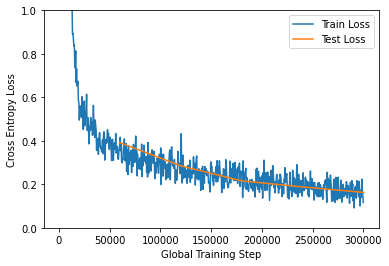

Final Test loss: 0.16277596447320217. Final Test accuracy: 0.9505


In [72]:
# We can now plot the training loss with our utility script

# Plot loss
utils.plot_loss(train_loss_dict, label="Train Loss")
utils.plot_loss(test_loss_dict, label="Test Loss")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

## Plotting example

In [73]:
# You can delete the remaining code of this notebook, as this is just to illustrate one method to solve the assignment tasks.


# This example code is here to illustrate how you can plot two different models to compare them.
# Lets change a small part of our model: the number of epochs trained (NOTE, use 5 epochs for your experiments in the assignment.)

# We reset the manual seed to 0, such that the model parameters are initialized with the same random number generator.
torch.random.manual_seed(0)
np.random.seed(0)


dataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)
model = create_model()

learning_rate = .0192
num_epochs = 6

# Redefine optimizer, as we have a new model.
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict_6epochs, test_loss_dict_6epochs = trainer.train(num_epochs)
num_epochs = 5

Training epoch 5: 100%|██████████| 938/938 [00:06<00:00, 144.20it/s]


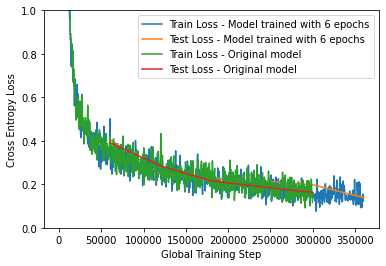

Final Test loss: 0.13872463521651426. Final Test accuracy: 0.9561


In [74]:
# We can now plot the two models against eachother

# Plot loss
utils.plot_loss(train_loss_dict_6epochs, label="Train Loss - Model trained with 6 epochs")
utils.plot_loss(test_loss_dict_6epochs, label="Test Loss - Model trained with 6 epochs")
utils.plot_loss(train_loss_dict, label="Train Loss - Original model")
utils.plot_loss(test_loss_dict, label="Test Loss - Original model")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

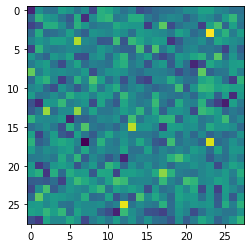

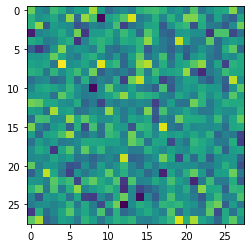

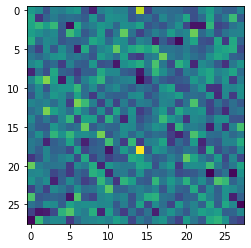

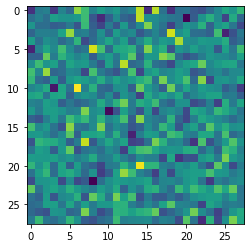

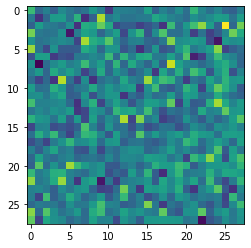

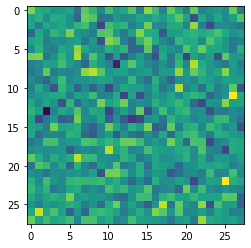

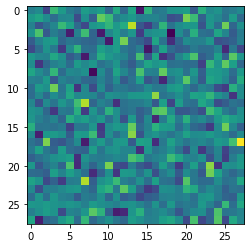

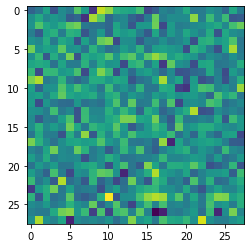

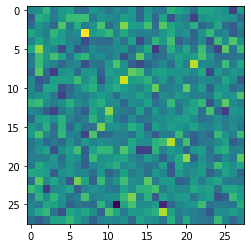

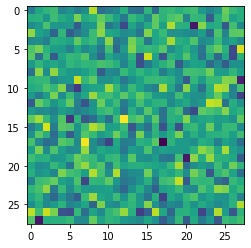

In [79]:
import math
weight = list(model.children())[7].weight.cpu().data
size = weight.size()
root = int(math.sqrt(size[1]))

for idx in range(len(weight)):
    weight_show = weight[idx].numpy().reshape(root,root)
    plt.imshow(weight_show)
    plt.show()

### Task A

### Task B

### Task C

### Task D